# Introducción a la visión artificial
* Versión 1.1 *

Para navegar hacia arriba y hacia abajo, puede usar las teclas de flecha hacia arriba y hacia abajo en su teclado <br />
Para ejecutar código en este libro de trabajo, seleccione el bloque de código y presione ** Shift + Enter ** <br />
Para editar el bloque de código, presione enter.

¡Así que comience desde arriba y trabaje hacia abajo para evitar resultados inesperados!


Para obtener más ayuda sobre el uso de Jupyter Notebook, puede hacer clic en Ayuda> Recorrido por la interfaz de usuario en el menú de arriba, <br />
o visite https://jupyter-notebook.readthedocs.io/en/stable/ui_components.html

Experimente y pruebe sus ideas, ¡porque esa es una de las formas más rápidas de aprender!

## 1. ¿Cómo ven las computadoras?
¿Por dónde empezamos?

De manera similar a como reconocemos los humanos, hay 2 partes. <br />
1) Ver con los ojos (o en este caso dada una imagen) <br />
2) Dar sentido a lo que vemos (reconocer a su amigo o lo que escribió o dibujó en la pulsera)

### Empezando con el código

En este taller, utilizaremos Intel® Distribution para Python y OpenCV.

Otra biblioteca Python útil será la biblioteca Numpy, que es muy útil para manipulaciones rápidas de matrices. Las imágenes se almacenan en realidad como matrices / matrices de píxeles y, por lo tanto, Numpy sería muy útil para ayudarnos a hacer un procesamiento de imágenes más rápido.

Si no tiene experiencia previa con Python y Numpy, <br />
puede obtener una buena introducción en línea en https://www.datacamp.com/courses/intro-to-python-for-data-science

Para ejecutar el bloque de código a continuación, selecciónelo y presione ** Shift + Enter ** <br />
Los resultados de su ejecución se imprimirán directamente debajo del bloque de código. En este caso, le mostrará su versión instalada de OpenCV y Python.

### Importando tus bibliotecas

In [1]:
import cv2              #Import the OpenCV Library
import numpy as np      #Import the Numpy library
import sys

print ("Ha instalado correctamente la versión de OpenCV "+cv2.__version__)
print ("Su version de python es " + sys.version)

Ha instalado correctamente la versión de OpenCV 4.5.1
Su version de python es 3.8.5 (default, Sep  3 2020, 21:29:08) [MSC v.1916 64 bit (AMD64)]


### 1.1 Viendo. ¡Mostremos nuestra primera imagen!

In [2]:
img = cv2.imread("images_cv/image001.png")   #Load the image file into memory
cv2.startWindowThread()
cv2.imshow("Image", img)                  #Display that image

cv2.waitKey(0)                            #Cleanup after any key is pressed
cv2.destroyAllWindows()
cv2.waitKey(1)

-1

#### Después de ejecutar el bloque de código anterior, ¡revise las nuevas ventanas para ver si se ha producido la imagen!

¡Averigüemos cuál es el tamaño de esta imagen!

In [3]:
print (img[:,:,2].shape)

(600, 800)


¡Genial! Ha utilizado OpenCV para leer su imagen y mostrarla en otra ventana.

Sin embargo, también hemos aprendido en la etapa de adquisición que podemos usar otra biblioteca para mostrar la imagen en este cuaderno. ¿Recuerdas qué biblioteca es?

### Tarea 1: Importe la biblioteca matplotlib y muestre la imagen en este cuaderno.

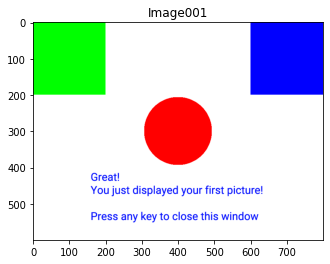

In [4]:
from matplotlib import pyplot as plt # import matplotlib

img_1 = cv2.imread("images_cv/image001.png")   #Load the image file into memory
img_1 = cv2.cvtColor(img_1,cv2.COLOR_BGR2RGB)
plt.imshow(img_1)
plt.title('Image001')
plt.show()


¿Es correcto su color? Si no es así, recuerde usar el comando correcto para cambiar el espacio de color.

¿Cree que la computadora comprende lo que hay en la imagen en esta etapa?

### 1.1b En lugar de solo una imagen, ¿qué tal si usas tu cámara web?

In [5]:
camera = cv2.VideoCapture(1) #create a VideoCapture object with the 'first' camera (your webcam)

while(True):
    ret, frame = camera.read()             # Capture frame by frame   
    cv2.imshow('Press Spacebar to Exit',frame)              # Display the frame
    
    if cv2.waitKey(1) & 0xFF == ord(' '):  # Stop if spacebar is detected
        break

camera.release()                           # Cleanup after spacebar is detected.
cv2.destroyAllWindows()

error: OpenCV(4.5.1) C:\Users\appveyor\AppData\Local\Temp\1\pip-req-build-kh7iq4w7\opencv\modules\highgui\src\window.cpp:376: error: (-215:Assertion failed) size.width>0 && size.height>0 in function 'cv::imshow'


¡Felicidades! ¿se vió en la pantalla?

### 1.2 Dándole sentido a lo que vemos

Así que hemos logrado rápidamente la primera parte de ver. Ahora la computadora necesita darle sentido a lo que ve.

¿Recuerda a Numpy? En OpenCV, las imágenes se almacenan como Numpy Arrays.

Estas matrices tienen métodos incorporados que puede utilizar para analizar rápidamente su imagen. <br />
Por ejemplo, **. Shape ** le indicaría las dimensiones de la matriz Numpy donde se almacena la imagen. (alto, ancho, canales) <br />
También hay varias otras técnicas avanzadas de manipulación de matrices, pero lo mantendremos simple por ahora.

De forma predeterminada, hay 3 canales para almacenar las intensidades de píxeles de Azul, Verde y Rojo. Este es el espacio de color predeterminado utilizado por OpenCV.

Para la imagen que mostró arriba, ¿Cuáles son las dimensiones? ¿De qué color es en diferentes partes de la imagen? ¿Cómo se representan las intensidades de color?

<img src = "images_cv/image001.png" alt = "Drawing" style = "width: 400px; border: 1px solid; float: left;" />
<div style = "clear: both;"> </div>

¡Intenta comprender la imagen por ti mismo a continuación!

#### Cuáles son las dimensiones de la imagen?

In [6]:
print(img.shape) # ¿Cuáles son las dimensiones de esta imagen?
                        # ¿Cuál es el ancho, cuál es la altura, cuántos canales hay?
                        # Sugerencia: las imágenes se representan en matrices Numpy como (alto, ancho, canales)

(600, 800, 3)


#### ¿Cuál es el color de la esquina superior izquierda de la imagen?

In [7]:
print(img[0,0])          # ¿Cuál es el color de la esquina superior izquierda de la imagen? Tenga en cuenta que la indexación de matrices comienza desde 0
                         # Sugerencia: los canales se representan como azul, verde, rojo por defecto

[  0 255   0]


### Tarea 2: averigüe el color de la esquina superior derecha de la imagen.
¿Cuál es el color de la esquina superior derecha de la imagen?

In [8]:
print(img[0,799])        # ¿Cuál es el color de la esquina superior derecha de la imagen?
                         # Sugerencia: Observe que el píxel más a la derecha es 799, no 800. La indexación de matrices numerosas comienza desde 0.

[255   0   0]


### Tarea 3: Descubra el color del medio de la imagen.
¿Cuál es el color en el medio de la imagen?

In [9]:
print(img[300,400])      # ¿Cuál es el color en el medio de la imagen?

[  0   0 255]


¿Cree que la computadora entiende que hay cuadrados y círculos en la imagen en esta etapa? <br />
¿O solo es consciente de que hay filas y filas de intensidades de píxeles que parecen tener valores de 0 a 255?

Sí, por cierto, las intensidades de píxeles de 0 a 255 son básicamente la cantidad de un color en particular presente. <br />
0 significa que la intensidad es 0 (básicamente oscura), mientras que 255 significa que está llena de ese color.

Entonces, (0,0,0) sería negro y (255,255,255) sería blanco. ¿Cómo representaría el azul, el verde o el rojo?

## 2. Procesamiento de imágenes

Hemos descubierto que una computadora ve las imágenes como matrices de intensidades de píxeles, <br />
y depende del desarrollador de visión por computadora (usted) darle sentido a esa imagen.

Analicemos algunas de las técnicas de procesamiento de imágenes más comunes que pueden resultarle útiles. <br />
Para un descubrimiento más detallado, se proporcionarán algunos enlaces al final para que pueda profundizar aún más.

Oh, espere, antes de eso, ¿puede pensar en algunos ejemplos de cómo se usa la visión por computadora en el mundo real hoy en día? Lo discutirán en clase más tarde, por lo que es posible que desee tomar algunas notas como piensa.

### 2.1 Espacios de color / organización de colores

Hemos estado usando el espacio de color azul, verde y rojo en las imágenes anteriormente.

¿Y si no necesitáramos todos los colores y solo necesitáramos saber qué tan clara u oscura es una imagen? Podemos convertir la foto a escala de grises.

¿Recuerda cómo se representan las imágenes en escala de grises en Numpy?

In [10]:
img = cv2.imread("images_cv/image001.png")
grey = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) #Convert color from BGR to grayscale
cv2.imshow("Grey",grey)

cv2.waitKey(0)                            # Cleanup after any key is pressed
cv2.destroyAllWindows()

### Tarea 4: Ahora muestre la imagen en escala de grises en este cuaderno.
Utilice una nueva variable (no img).

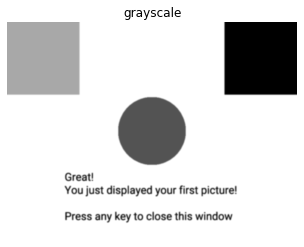

In [11]:
img_1 = cv2.imread('images_cv/image001.png',0) # the number zero opens the image as a grayscale image
plt.imshow(img_1, cmap = 'gray', interpolation = 'bicubic')
plt.title('grayscale')
plt.axis('off')
plt.show()

### Tarea 5: mostrar la forma de matriz en escala de grises.
¿Qué número esperas ver?

In [12]:
print(grey.shape)                         # ¿Estas dimensiones son diferentes de la img.shape anterior?

(600, 800)


¿Se está utilizando menos memoria para almacenar la imagen ahora que todo está en escala de grises? <br />
¿Significa esto que el procesamiento de esta imagen sería potencialmente más rápido ya que tiene 1/3 del tamaño de la matriz original?

### Tarea 6: Encuentra el color de la esquina superior izquierda de la imagen.
¿Cuál es el color de la esquina superior izquierda de la imagen?

In [13]:
print(grey[0,0])          # ¿Cuál es el color de la esquina superior izquierda de la imagen? Tenga en cuenta que la indexación de matrices comienza desde 0
                          # ¿Cómo se compara esto con su hallazgo anterior anterior?

150


### Tarea 7: averigua el color de la esquina superior derecha de la imagen.
¿Cuál es el color de la esquina superior derecha de la imagen?

In [14]:
print(grey[0,799])       # ¿Cuál es el color de la esquina superior derecha de la imagen?
                         # ¿Cómo se compara esto con su hallazgo anterior anterior?

29


Dato curioso: ¿Algunos colores parecen más oscuros que otros cuando se convierten a escala de grises?
Puede leer más sobre los diferentes espacios de color en https://docs.opencv.org/4.0.0/de/d25/imgproc_color_conversions.html

No profundizaremos demasiado en los otros espacios de color, pero si está interesado, lea el enlace de arriba. Y cuando tenga más preguntas, puede usar Internet para ayudarlo.

### 2.2 Umbral, enmascaramiento y región de interés
Anteriormente, vimos cómo algunos colores eran más oscuros que otros. ¿Y si solo estuviéramos interesados en una parte de la imagen que fuera muy oscura o muy clara? ¿Podríamos filtrar solo el cuadrado en la parte superior derecha de la pantalla?

** Técnica 1: Intensidad de escala de grises **

In [15]:
# Recuerde que el cuadrado de la parte superior derecha tenía una intensidad de píxeles de 29
# Ahora todo lo que tenga un valor superior a 29 se convertirá en 255 (blanco)
# Esto significa que estamos estableciendo un valor umbral de 29

ret,thresholded = cv2.threshold(grey,29,255,cv2.THRESH_BINARY)  
cv2.imshow("Thresholded",thresholded)

cv2.waitKey(0)                            # Cleanup after any key is pressed
cv2.destroyAllWindows()

El cuadrado que queremos aparece en negro, mientras que las otras partes de la imagen aparecen en blanco. Ahora podemos centrarnos en esta área para futuros procesos.

El área en la que queremos enfocarnos generalmente se llama Región de interés (ROI)

### Tarea 8: ¿Qué pasa si quieres que se capture el texto, el círculo y el medio y el cuadro de la derecha (marcado en negro)?

In [16]:
ret,thresholded = cv2.threshold(grey,100,255,cv2.THRESH_BINARY)  
cv2.imshow("Thresholded",thresholded)

cv2.waitKey(0)                            # Cleanup after any key is pressed
cv2.destroyAllWindows()

Sigamos trabajando con el valor umbral de 29.
Por lo general, nos gustaría que las regiones de interés (ROI) fueran blancas y las otras áreas negras. Intentemos:

In [17]:
ret,thresholded = cv2.threshold(grey,29,255,cv2.THRESH_BINARY_INV)    #we use cv2.THRESH_BINARY_INV instead of cv2.THRESH_BINARY
cv2.imshow("Thresholded",thresholded)

cv2.waitKey(0)                            # Cleanup after any key is pressed
cv2.destroyAllWindows()

### Tarea 9: ¿Qué pasa si quieres que el texto, el círculo y el centro y el cuadro de la derecha sean el ROI (marcado en blanco)?

In [18]:
ret,thresholded = cv2.threshold(grey,100,255,cv2.THRESH_BINARY_INV)  
cv2.imshow("Thresholded",thresholded)

cv2.waitKey(0)                            # Cleanup after any key is pressed
cv2.destroyAllWindows()

¿Para qué sirve esto?

Bueno, establecer el umbral de la Región de interés (ROI) puede permitirnos usarla como una máscara para mostrar en la imagen original.

### ¿Máscara?
** Pero, ¿qué es una máscara? **

Echemos un vistazo a la siguiente ilustración:

<img src = "images_cv/image001_masking.jpg" />

En la imagen (en el medio) de arriba, puede ver la máscara del cuadrado azul en la esquina superior derecha. Cuando aplicamos esa máscara (imagen en el medio) a la imagen original (imagen a la izquierda), solo queda el cuadrado azul en la imagen enmascarada (imagen a la derecha).

La capa de máscara ayuda a resaltar las partes de la imagen que nos interesan. Cuando se aplica la máscara a la imagen, solo se conservan las partes que nos interesan (regiones blancas de la máscara), mientras que las partes restantes (negro regiones) de la imagen se descartan.

Dato curioso: también puede ver este concepto en funcionamiento en softwares de edición de imágenes populares como Adobe Photoshop, donde puede aplicar "máscaras de recorte".

In [19]:
ret,thresholded = cv2.threshold(grey,29,255,cv2.THRESH_BINARY_INV)  

masked = cv2.bitwise_and(img, img, mask = thresholded) 
cv2.imshow("Masked", masked)

cv2.waitKey(0)                            # Cleanup after any key is pressed
cv2.destroyAllWindows()

¡Genial! ¿Consiguió filtrar el cuadrado azul?

Bien, es hora de que experimente y vea qué más te gustaría establecer. ¿Puedes poner el umbral solo en el Círculo en el medio? ¿Cómo harías eso en una capa de escala de grises?

Quizás la capa gris no sea la mejor capa para trabajar. Recuerda que tienes la imagen original:

<img src = "images_cv/image001.png" alt = "Drawing" style = "width: 400px; border: 1px solid; float: left;" />
<div style = "clear: both;"> </div>

** Técnica 2: Colores. ** <br />
¿Recuerde que las imágenes son matrices numerosas? Y las matrices Numpy se pueden filtrar fácilmente con filtros avanzados.

Para hacernos la vida más fácil, es posible que deseemos cambiar el blanco del fondo a negro.

In [20]:
mask = img.copy()                         
(b,g,r) = cv2.split(img)                  
mask[(b==255)&(g==255)&(r==255)] = 0      # Se cambia el fondo blanco (cuando todos los valores RGB son 255) a negto (0).

cv2.imshow("Mask",mask)

cv2.waitKey(0)                            
cv2.destroyAllWindows()

Exploremos cómo se ven las diferentes capas de la máscara. Son las capas 0, 1 y 2 respectivamente:

In [21]:
cv2.imshow("Blue Mask",mask[:,:,0])       # Notice how the words are blue also
cv2.waitKey(0)                            # Cleanup after any key is pressed
cv2.destroyAllWindows()

In [22]:
cv2.imshow("Green Mask",mask[:,:,1])
cv2.waitKey(0)                            # Cleanup after any key is pressed
cv2.destroyAllWindows()

In [23]:
cv2.imshow("Red Mask",mask[:,:,2])
cv2.waitKey(0)                            # Cleanup after any key is pressed
cv2.destroyAllWindows()

** Técnica 3: manipulación rápida de matrices Numpy según la posición **

Hay algunos artefactos alrededor de las palabras de esta capa verde. ¿Podemos limpiarlo?

In [24]:
mask[300:,:,1]=0                          # Remember that the image is a matrix. Let's wipe the bottom half to black (0)
cv2.imshow("Green Mask",mask[:,:,1])
cv2.waitKey(0)                            # Cleanup after any key is pressed
cv2.destroyAllWindows()

Si no recuerda el tamaño de su imagen, ¿qué comando puede usar para averiguarlo?

In [25]:
mask.shape

(600, 800, 3)

Ahora veamos si hay artefactos alrededor de las palabras de la capa roja.

In [26]:
cv2.imshow("Red Mask",mask[:,:,2])
cv2.waitKey(0)                            # Cleanup after any key is pressed
cv2.destroyAllWindows()

También hay algunos artefactos alrededor de las palabras para esta capa roja. ¿Podemos limpiarlo?

### Tarea 10: Limpiaalrededor de las palabras para esta máscara roja.

In [27]:
mask[410:,:,2]=0
cv2.imshow("Red Mask",mask[:,:,2])
cv2.waitKey(0)                            # Cleanup after any key is pressed
cv2.destroyAllWindows()

Ahora podemos simplemente obtener los objetos según el color.

In [28]:
#layer 2 is the red layer. Rememeber (B,G,R)
masked = cv2.bitwise_and(img,img,mask=mask[:,:,2])
cv2.imshow("Circle",masked)                   

cv2.waitKey(0)                            # Cleanup after any key is pressed
cv2.destroyAllWindows()

In [29]:
#layer 1 is the green layer. Rememeber (B,G,R)
masked = cv2.bitwise_and(img,img,mask=mask[:,:,1])
cv2.imshow("Left Green Rectangle",masked)
cv2.waitKey(0)                            # Cleanup after any key is pressed
cv2.destroyAllWindows()

In [30]:
#layer 0 is the blue layer. Rememeber (B,G,R)
masked = cv2.bitwise_and(img,img,mask=mask[:,:,0])
cv2.imshow("Right Blue Rectangle",masked)
cv2.waitKey(0)                            # Cleanup after any key is pressed
cv2.destroyAllWindows()

¿Observa que las palabras también aparecen no solo en el rectángulo? Esto se debe a que las palabras también son _¡azules! _

Si no desea que aparezcan las palabras, puede "borrarlas":

### Tarea 11: ¡Borre las palabras!

In [31]:
mask[300:,:,0]=0                          # Remember that the image is a matrix. Let's wipe the bottom half to black (0)
masked = cv2.bitwise_and(img,img,mask=mask[:,:,0])
cv2.imshow("Right Blue Rectangle",masked)
cv2.waitKey(0)                            # Cleanup after any key is pressed
cv2.destroyAllWindows()

Hemos dedicado bastante tiempo a enmascarar, establecer umbrales y regiones de interés. Hay diferentes enfoques que puede utilizar, ya sea por color o por intensidad de píxel, o manipulando Numpy Array (por ejemplo, para acceder y modificar partes de la imagen). Tómese su tiempo para practicar estas técnicas y pruébelas con diferentes imágenes.

En la visión por computadora, y en la vida, a menudo hay varias formas de alcanzar el mismo objetivo. ¿Puede pensar en formas más eficientes de obtener su Región de interés?

### 2.3 Transformaciones geométricas. Cambiar el tamaño y recortar

Continuando, tal vez la imagen sea demasiado grande o demasiado pequeña, ¿cómo podríamos cambiar su tamaño?

### Tarea 12: Convertir la imagen de 800x600 en una imagen de 400x300

In [32]:
img = cv2.imread("images_cv/image001.png")   
resized = cv2.resize(img, (400, 300))
cv2.imshow("Resized",resized)
cv2.waitKey(0)                            
cv2.destroyAllWindows()

¿Qué forma tiene ahora?

In [33]:
print(resized.shape)

(300, 400, 3)


Tenga en cuenta que la función de cambio de tamaño también se puede utilizar para estirar la imagen, si utiliza una relación de aspecto diferente.

### Tarea 13: Estire la imagen de 800x600 a una imagen de 200x300

In [34]:

resized = cv2.resize(img, (200, 300))          
cv2.imshow("Resized",resized)
cv2.waitKey(0)                            
cv2.destroyAllWindows()

### Recorte

Recorta para obtener la mitad superior de la imagen:

In [35]:
cv2.imshow("Cropped Top",img[:300,:,:])
cv2.waitKey(0)                            # Cleanup after any key is pressed
cv2.destroyAllWindows()

### Tarea: Recorta para obtener el lado derecho de la imagen.

In [36]:
cv2.imshow("Cropped Right",img[:,399:799,:])
cv2.waitKey(0)                            
cv2.destroyAllWindows()

Puedes jugar con él. Recortar a una región de interés sería más útil. Pasemos a otro método muy útil para extraer una región de interés (ROI)

### 2.4 Detección de contorno

Esto es lo que se usa comúnmente para buscar regiones de interés, generalmente usando una máscara de umbral.

** Pero, ¿qué es un contorno? **

Puede pensar en los contornos como una [curva dibujada a lo largo de un límite] (https://docs.opencv.org/3.4/d4/d73/tutorial_py_contours_begin.html).

Para simplificar esto, piense en todas las máscaras en blanco y negro. Habrá límites, cambios bruscos de color. Contours es una curva dibujada a lo largo de este límite.

La detección de contornos básicamente encuentra y devuelve estos diferentes grupos como contornos.

Para ilustrar, ¿cuántas regiones de color blanco crees que hay en la imagen de abajo?

<img src = "images_cv/image001_3contours.png" style = "width: 400px; float: left;" />
<div style = "clear: both;"> </div>

¿Adivinó que se han detectado 3 contornos? Intentemos cargar esa imagen y dibujar los contornos del contorno.

In [37]:
greytest = cv2.imread("images_cv/image001_3contours.png",0)    # Load that image
contouroutlines = np.zeros(greytest.shape,dtype="uint8")    # Create a blank canvas for drawing detected contours

# Let's find the contours! https://docs.opencv.org/3.4/d3/dc0/group__imgproc__shape.html#ga17ed9f5d79ae97bd4c7cf18403e1689a
(cnts,_) = cv2.findContours(greytest, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

for (i, c) in enumerate(cnts):    
    cv2.drawContours(contouroutlines, [c], -1, 255, 1)  # For each contour, draw just the outline of the contours
                                                        # https://docs.opencv.org/3.4/d6/d6e/group__imgproc__draw.html#ga746c0625f1781f1ffc9056259103edbc
cv2.imshow("Contour Outlines",contouroutlines)          # Display the results
cv2.waitKey(0)                                          # Cleanup after any key is pressed
cv2.destroyAllWindows()

print("There are "+str(len(cnts))+" contours!")         # Print out the number of contours detected

There are 3 contours!


Ese fue un ejemplo simple con solo 3 contornos.

¿Cuántos contornos esperaría encontrar en nuestra imagen original con umbral?

<img src="images_cv/image001_allcontours.png" style="width:400px; float:left;" />
<div style="clear:both;"></div>


Primero crearemos la imagen usando el método de umbral.

In [38]:
grey = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

#We apply a threshold
(T, thresholded) = cv2.threshold(grey, 0, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)
cv2.imshow("Thresholded",thresholded)

cv2.waitKey(0)                            # Cleanup after any key is pressed
cv2.destroyAllWindows()

Ahora averiguaremos el contorno. ¿Cuántos cree que serán? ¡Mire la foto con cuidado!

In [39]:
# Let's find the contours!
(cnts,_) = cv2.findContours(thresholded, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

mask = np.zeros(img.shape,dtype="uint8")  # Create a canvas for drawing detected contours
for (i, c) in enumerate(cnts):    
    cv2.drawContours(mask, [c], -1, (0,255,0), 1) 
    
cv2.imshow("Mask",mask)  
cv2.waitKey(0)                            # Cleanup after any key is pressed
cv2.destroyAllWindows()


print("Hay "+str(len(cnts))+" contornos!")

Hay 78 contornos!


¿Por qué hay 78 contornos? Eso es por el texto.

Intentemos etiquetar los contornos para visualizar lo que realmente se está contando.

A continuación, verá cómo cada letra tiende a formar 1 contorno. Pero observe cómo algunas letras como "i" en realidad se cuentan como 2 contornos, ya que la parte superior de la "i" y la parte inferior de la "i" no están conectadas. Lo mismo ocurre con el signo de exclamación.

El código siguiente parece un poco más largo porque se ha agregado código para las anotaciones. Comprenderá mejor el código cuando visite la sección 2.5 un poco más adelante. Mientras tanto, no se preocupe por el código. Simplemente ejecute el código y vea cómo se cuentan los contornos. Tome nota de los cuadros delimitadores rojos que se han dibujado alrededor de cada "contorno".

In [40]:
grey = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

#We apply a threshold
(T, thresholded) = cv2.threshold(grey, 0, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)
cv2.imshow("Thresholded",thresholded)

# Let's find the contours!
(cnts,_) = cv2.findContours(thresholded, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = sorted(cnts, key=lambda cnts: cv2.boundingRect(cnts)[1])  #sort contours from top to bottom.

mask = cv2.merge([thresholded,thresholded,thresholded])  # Create a canvas for drawing detected contours
for (i, c) in enumerate(cnts):   #https://docs.opencv.org/3.1.0/dd/d49/tutorial_py_contour_features.html  
    #cv2.drawContours(mask, [c], -1, (255,255,255), -1) 
    (x, y, w, h) = cv2.boundingRect(c)                   # Get the x,y coordinates of the contour's bounding box 
    cv2.rectangle(mask, (x,y), (x+w,y+h), (0,0,255))     # Draw the bounding boxes in red

    cv2.putText(mask, ""+str(i+1), (x,y+28), cv2.FONT_HERSHEY_SIMPLEX, 0.25, (0,255,0), 1)
    
cv2.imshow("Mask",mask)  
cv2.waitKey(0)                            # Cleanup after any key is pressed
cv2.destroyAllWindows()


print("Hay "+str(len(cnts))+" contornos!")

Hay 78 contornos!


¿Quiere saber más sobre los contornos? Puede visitar https://docs.opencv.org/3.3.1/d4/d73/tutorial_py_contours_begin.html para profundizar más. Como siempre, continúe buscando en Internet porque hay un tesoro escondido de información, ¡y será muy útil a medida que profundice!

Consejo: En los ejemplos anteriores, usamos cv2.RETR_EXTERNAL para obtener los contornos externos. También hay otras opciones que puede especificar para obtener diferentes tipos de contornos. Por ejemplo, cv2.RETR_LIST enumerará todos los contornos y no solo los externos.

** Uso de contornos como máscaras de imagen **

¿Recuerdas que hablamos de máscaras de imágenes antes? ¡Los contornos también se pueden usar para crear máscaras!

Establezca el último parámetro de la función drawContour en -1 para crear un relleno (en lugar de un contorno) y utilícelo como máscara.

In [41]:
(T, thresholded) = cv2.threshold(grey, 0, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)
thresholded[410:,:]=0                     # Shortcut to remove the text since it is on the bottom half of the image!
#cv2.imshow("Thresholded",thresholded)

#How many contours do you think there are?
(cnts,_) = cv2.findContours(thresholded, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

mask = np.zeros(thresholded.shape,dtype="uint8")
for (i, c) in enumerate(cnts):    
    cv2.drawContours(mask, [c], -1, 255, -1)  #the last parameter defines the outline thickness. -1 will fill the contour
    
cv2.imshow("Mask",mask)
cv2.imshow("Masked Image",cv2.bitwise_and(img,img,mask=mask))  
cv2.waitKey(0)                            # Cleanup after any key is pressed
cv2.destroyAllWindows()


print("There are "+str(len(cnts))+" contours!")

There are 3 contours!


¿Le resultó más fácil que ajustar manualmente el umbral de cada color?

### 2.5 Dibujar líneas y escribir textos

De hecho, hicimos un poco de esto en el ejercicio de contorno anterior, usando un método llamado drawContour. Veamos cómo podemos agregar líneas y palabras a las imágenes, ya que es posible que queramos anotar nuestras imágenes. ¡Revisemos el ejemplo en 2.4 y agreguemos etiquetas a nuestros contornos!

Solo las 3 líneas que han cambiado se comentan a continuación. Las otras líneas de código son similares al ejemplo en 2.4 y puede consultar ese ejemplo para recapitular lo que hacen esas líneas de código.

Primero, obtenemos el cuadro delimitador para cada contorno, dibujamos un rectángulo a su alrededor y luego agregamos el texto para etiquetar cada contorno.

In [42]:
greytest = cv2.imread("images_cv/image001_3contours.png",0)
contouroutlines = np.zeros(greytest.shape,dtype="uint8")

(cnts,_) = cv2.findContours(greytest, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

for (i, c) in enumerate(cnts):    
    cv2.drawContours(contouroutlines, [c], -1, 255, 1)

    # GET BOUNDING BOX OF EACH CONTOUR
    (x, y, w, h) = cv2.boundingRect(c)
    
    # DRAW A RECTANGLE AROUND EACH CONTOUR (I.E. DRAW THE BOUNDING BOX)
    cv2.rectangle(contouroutlines, (x, y), (x+w, y+h), (255,255,0), 2) 
    
    # ADD THE TEXT "COUNTOUR <>" TO EACH CONTOUR
    cv2.putText(contouroutlines, "Contour "+str(i+1), (x,y-10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 0), 2)

    
cv2.imshow("Contour Outlines",contouroutlines)          
cv2.waitKey(0)                                          
cv2.destroyAllWindows()

print("There are "+str(len(cnts))+" contours!")         

There are 3 contours!


Para obtener más detalles sobre cómo escribir texto en la pantalla y dibujar formas como rectángulos y círculos, puede visitar https://docs.opencv.org/4.0.0/dc/da5/tutorial_py_drawing_functions.html

Si luego crea aplicaciones para la detección de objetos, puede usar este método para anotar lo que realmente detecta. ¡O también puede crear su propia obra de arte e imágenes usando solo código!

Intentemos dibujar algo desde cero:

**ACCESO DENEGADO**

In [43]:
# Create an empty canvas (height,width,channels) - In this case: 3 colour channels, width 400, and height 300 
canvas_accessdenied = np.zeros((600,800,3),dtype="uint8")      

# Add a Hollow Rectangle at (x=100,y=230) with the colour (255,255,0), and line thickness 2 
cv2.rectangle(canvas_accessdenied, (100, 230), (760, 370), (255,255,0), 2)  

# Add your Text at (x=150,y=320) the colour (100,100,255), fint size 2, and line thickness 5 
cv2.putText(canvas_accessdenied, "ACCESO DENEGADO", (150,320), cv2.FONT_HERSHEY_SIMPLEX, 2, (100,100,255), 5)

cv2.imshow("Canvas Access Denied",canvas_accessdenied)  
cv2.waitKey(0)                            # Cleanup after any key is pressed
cv2.destroyAllWindows()

Ahora acceso concedido:

**ACCESO CONCEDIDO**

In [44]:
# Create an empty canvas (height,width,channels) - In this case: 3 colour channels, width 400, and height 300 
canvas_accessgranted = np.zeros((600,800,3),dtype="uint8")      

# Add a Hollow Rectangle at (x=100,y=230) with the colour (255,255,0), and line thickness 2 
cv2.rectangle(canvas_accessgranted, (100, 230), (770, 370), (255,255,0), 2)  

# Add your Text at (x=130,y=320) the colour (255,100,100), fint size 2, and line thickness 5 
cv2.putText(canvas_accessgranted, "ACCESO CONCEDIDO", (130,320), cv2.FONT_HERSHEY_SIMPLEX, 2, (255,100,100), 5)

cv2.imshow("Canvas Access Granted",canvas_accessgranted)  
cv2.waitKey(0)                            # Cleanup after any key is pressed
cv2.destroyAllWindows()

### Tarea 16: Crea un lienzo con 2 cuadros. El primer cuadro dice "ACCESO CONCEDIDO", y el segundo cuadro dice "POR FAVOR CONTINÚE".

In [61]:
# Create an empty canvas (height,width,channels) - In this case: 3 colour channels, width 400, and height 300 
canvas_accessgranted = np.zeros((600,800,3),dtype="uint8")      

# Add a Hollow Rectangle at (x=100,y=230) with the colour (255,255,0), and line thickness 2 
cv2.rectangle(canvas_accessgranted, (100, 150), (770, 250), (255,255,0), 2)  

# Add your Text at (x=130,y=320) the colour (255,100,100), fint size 2, and line thickness 5 
cv2.putText(canvas_accessgranted, "ACCESO CONCEDIDO", (130,220), cv2.FONT_HERSHEY_SIMPLEX, 2, (255,100,100), 5)

cv2.rectangle(canvas_accessgranted, (30, 350), (770, 450), (255,255,0), 2)  
cv2.putText(canvas_accessgranted, "POR FAVOR CONTINUE", (50,420), cv2.FONT_HERSHEY_SIMPLEX, 2, (255,100,100), 5)

cv2.imshow("Canvas Access Granted",canvas_accessgranted)  
cv2.waitKey(0)                            # Cleanup after any key is pressed
cv2.destroyAllWindows()

## ¡Felicidades!